In [21]:
import sys
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

sys.path.append(f'{os.getcwd()}/../src')
                
from genetist import Genetist

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [23]:
fixed_params = {
    'max_depth': list(range(1, 15)),
    'n_estimators': list(range(20, 200)),
    'learning_rate': [0.0005, 0.001, 0.01, 0.05, 0.1],
    'objective': ['regression', 'regression_l1']
}

params_space = {
    'max_depth': {'low': 1, 'high': 15},
    'learning_rate': {'low': 0.0005, 'high': 0.1},
    'n_estimators': {'low': 20, 'high': 200},
    'objective': {'choices': ['regression', 'regression_l1']},
}

def objective(individual):
    df = pd.read_csv('../datasets/california_housing.csv')
    df = pd.get_dummies(df, drop_first=True, dummy_na=True)    
    df.dropna(how='any', axis=0, inplace=True)
    
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    
    max_depth = individual['max_depth']
    learning_rate = individual['learning_rate']
    n_estimators = individual['n_estimators']
    objective = individual['objective']
    
    maes = list()
    kf = KFold(n_splits=3)
    for train_indexes, test_indexes in kf.split(X):
        X_train, X_test = X.iloc[train_indexes, :], X.iloc[test_indexes, :]
        y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]
        
        model = LGBMRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective, n_jobs=2)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, predictions)
        maes.append(mae)
    
    return np.mean(maes)

In [24]:
genetist = Genetist(
    objective=objective,
    params=params_space,
    num_population=20,
    generations=10,
    elite_rate=0.1,
    prob_mutation=0.1,
    direction='minimize',
    verbose=True
)

results = genetist.run_evolution()

print()
print(f'EXECUTION TIME={results.execution_time}')
print(f'BEST SCORE={results.best_score}')
print(f'BEST INDIVIDUAL={results.best_individual}')
print('BEST PER GENERATION:')
display(results.best_per_generation_dataframe)

RUNNING GENERATION 1:  10%|██▏                   | 1/10 [00:06<00:57,  6.39s/it]

THE BEST SOLUTION IN GENERATION 1 IS: [10, 0.07103406275114463, 177, 'regression'] WITH A SCORE OF 47010.06250570473


RUNNING GENERATION 2:  20%|████▍                 | 2/10 [00:15<01:02,  7.82s/it]

THE BEST SOLUTION IN GENERATION 2 IS: [10, 0.07103406275114463, 177, 'regression'] WITH A SCORE OF 47010.06250570473


RUNNING GENERATION 3:  30%|██████▌               | 3/10 [00:24<01:00,  8.57s/it]

THE BEST SOLUTION IN GENERATION 3 IS: [10, 0.07103406275114463, 177, 'regression'] WITH A SCORE OF 47010.06250570473


RUNNING GENERATION 4:  40%|████████▊             | 4/10 [00:34<00:55,  9.23s/it]

THE BEST SOLUTION IN GENERATION 4 IS: [7, 0.07103406275114463, 177, 'regression_l1'] WITH A SCORE OF 45766.59055440472


RUNNING GENERATION 5:  50%|███████████           | 5/10 [00:44<00:47,  9.54s/it]

THE BEST SOLUTION IN GENERATION 5 IS: [15, 0.07103406275114463, 177, 'regression_l1'] WITH A SCORE OF 45623.06412426286


RUNNING GENERATION 6:  60%|█████████████▏        | 6/10 [00:55<00:39,  9.98s/it]

THE BEST SOLUTION IN GENERATION 6 IS: [15, 0.07103406275114463, 177, 'regression_l1'] WITH A SCORE OF 45623.06412426286


RUNNING GENERATION 7:  70%|███████████████▍      | 7/10 [01:07<00:31, 10.39s/it]

THE BEST SOLUTION IN GENERATION 7 IS: [15, 0.07103406275114463, 177, 'regression_l1'] WITH A SCORE OF 45623.06412426286


RUNNING GENERATION 8:  80%|█████████████████▌    | 8/10 [01:18<00:21, 10.64s/it]

THE BEST SOLUTION IN GENERATION 8 IS: [15, 0.07103406275114463, 197, 'regression_l1'] WITH A SCORE OF 45453.46420627446


RUNNING GENERATION 9:  90%|███████████████████▊  | 9/10 [01:30<00:11, 11.06s/it]

THE BEST SOLUTION IN GENERATION 9 IS: [15, 0.07103406275114463, 197, 'regression_l1'] WITH A SCORE OF 45453.46420627446


RUNNING GENERATION 10: 100%|████████████████████| 10/10 [01:42<00:00, 10.27s/it]

THE BEST SOLUTION IN GENERATION 10 IS: [15, 0.07103406275114463, 197, 'regression_l1'] WITH A SCORE OF 45453.46420627446

EXECUTION TIME=0 hours 01 minutes 42.727146 seconds
BEST SCORE=45453.46420627446
BEST INDIVIDUAL=[15, 0.07103406275114463, 197, 'regression_l1']
BEST PER GENERATION:


,GENERATION,BEST_SCORE,BEST_INDIVIDUAL,max_depth,learning_rate,n_estimators,objective
7,8,45453.464206,"[15, 0.07103406275114463, 197, regression_l1]",15,0.071034,197,regression_l1
8,9,45453.464206,"[15, 0.07103406275114463, 197, regression_l1]",15,0.071034,197,regression_l1
9,10,45453.464206,"[15, 0.07103406275114463, 197, regression_l1]",15,0.071034,197,regression_l1
4,5,45623.064124,"[15, 0.07103406275114463, 177, regression_l1]",15,0.071034,177,regression_l1
5,6,45623.064124,"[15, 0.07103406275114463, 177, regression_l1]",15,0.071034,177,regression_l1
6,7,45623.064124,"[15, 0.07103406275114463, 177, regression_l1]",15,0.071034,177,regression_l1
3,4,45766.590554,"[7, 0.07103406275114463, 177, regression_l1]",7,0.071034,177,regression_l1
0,1,47010.062506,"[10, 0.07103406275114463, 177, regression]",10,0.071034,177,regression
1,2,47010.062506,"[10, 0.07103406275114463, 177, regression]",10,0.071034,177,regression
2,3,47010.062506,"[10, 0.07103406275114463, 177, regression]",10,0.071034,177,regression


<AxesSubplot:>

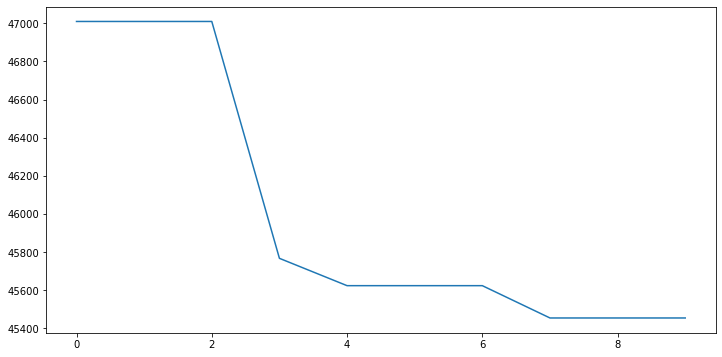

In [25]:
df_plot = results.best_per_generation_dataframe.sort_values(by=['GENERATION'])
df_plot.BEST_SCORE.plot(figsize=(12,6))